In [0]:
import pandas as pd
import numpy as np
import tensorflow as tf
import tensorflow_docs as tfdocs
import tensorflow_docs.modeling
import tensorflow_docs.plots
from keras.models import Sequential
from keras.layers import Dense
from keras.metrics import RootMeanSquaredError
from keras.optimizers import RMSprop
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from tensorflow import feature_column
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

In [0]:
df= pd.read_csv('https://raw.githubusercontent.com/Khaledjallouli/project/master/data/data_regression_goals/sliding02_goals.csv')

In [229]:
df.head()

,Unnamed: 0,home_team_goal,away_team_goal,odds-home,odds-draw,odds-away,home-wins,home-draws,home-losses,home-goals,home-opposition-goals,home-shots,home-shots_on_target,home-opposition_shots,home-opposition_shots_on_target,away-wins,away-draws,away-losses,away-goals,away-opposition-goals,away-shots,away-shots_on_target,away-opposition_shots,away-opposition_shots_on_target
0,0,2,1,3.50,3.30,2.10,1,3,6,11,16,137,67,117,53,8,2,0,15,6,161,78,72,30
1,1,2,2,2.50,3.30,2.88,3,1,6,8,16,134,64,151,77,3,3,4,11,18,104,44,87,36
2,2,1,2,1.91,3.40,4.20,4,2,4,10,15,120,58,124,56,2,2,6,11,15,134,59,100,46
3,3,2,1,3.25,3.25,2.30,5,2,3,22,12,177,82,74,37,6,3,1,19,8,169,95,113,58
4,4,3,0,1.20,6.00,19.00,7,2,1,15,8,161,72,74,31,3,2,5,10,17,143,69,134,69


In [0]:
X= df.iloc[:,3:-1].values
y= df.iloc[:,1:3].values

In [192]:
print(X)

[[  3.5    3.3    2.1  ... 161.    78.    72.  ]
 [  2.5    3.3    2.88 ... 104.    44.    87.  ]
 [  1.91   3.4    4.2  ... 134.    59.   100.  ]
 ...
 [  1.8    3.75   4.5  ...  84.    43.   118.  ]
 [  1.33   5.25   9.   ... 103.    53.   122.  ]
 [  1.67   4.2    5.25 ... 114.    63.   106.  ]]


In [193]:
print(y)

[[2 1]
 [2 2]
 [1 2]
 ...
 [4 1]
 [3 1]
 [3 1]]


In [242]:
for index_home in range( len(y) ):
  for index_away in range (len(y[index_home])):
    if y[index_home][index_away] >=5:
      y[index_home][index_away]=5
print(y)    

[[2 1]
 [2 2]
 [1 2]
 ...
 [4 1]
 [3 1]
 [3 1]]


In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2, random_state=0)

In [0]:
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

**Building Baseline Model with Densely Fully connected hidden layers with the same number of neurons as input attributes (21)**

In [0]:
# define base model
def baseline_model():
  model= Sequential()
  model.add(Dense(40, activation='relu'))
  model.add(Dense(30, activation='relu'))
  model.add(Dense(20, activation='relu'))
  model.add(Dense(10, activation='relu'))
  model.add(Dense(2))
  optimizer= tf.keras.optimizers.RMSprop(0.001)
  #compile model
  model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mae', 'mse', 'accuracy'])
  return model

In [0]:
model= baseline_model()

In [267]:
history = model.fit(
  X_train, y_train, batch_size=500,
  epochs=1000, validation_split = 0.2, verbose=0,
  callbacks=[tfdocs.modeling.EpochDots()])


Epoch: 0, accuracy:0.8071,  loss:0.4078,  mae:0.4950,  mse:0.4078,  val_accuracy:0.6004,  val_loss:2.4505,  val_mae:1.1929,  val_mse:2.4505,  
....................................................................................................
Epoch: 100, accuracy:0.8044,  loss:0.4091,  mae:0.4971,  mse:0.4091,  val_accuracy:0.5968,  val_loss:2.4435,  val_mae:1.1907,  val_mse:2.4435,  
....................................................................................................
Epoch: 200, accuracy:0.8056,  loss:0.4106,  mae:0.4983,  mse:0.4106,  val_accuracy:0.5977,  val_loss:2.4669,  val_mae:1.1941,  val_mse:2.4669,  
....................................................................................................
Epoch: 300, accuracy:0.8071,  loss:0.4103,  mae:0.4987,  mse:0.4103,  val_accuracy:0.5977,  val_loss:2.4847,  val_mae:1.1980,  val_mse:2.4847,  
....................................................................................................
Epoch: 400, accur

In [268]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,val_loss,val_mae,val_mse,val_accuracy,loss,mae,mse,accuracy,epoch
995,2.532948,1.208452,2.532948,0.598579,0.406251,0.495349,0.406251,0.803778,995
996,2.530773,1.208830,2.530773,0.600355,0.407447,0.497504,0.407447,0.802444,996
997,2.538203,1.208007,2.538203,0.592362,0.407577,0.496991,0.407577,0.802444,997
998,2.515686,1.205488,2.515686,0.603908,0.406200,0.495631,0.406200,0.800889,998
999,2.543253,1.212139,2.543253,0.595915,0.406620,0.496093,0.406620,0.808000,999


In [280]:
model = baseline_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)

early_history = model.fit(X_train, y_train, 
                    epochs=1000, validation_split = 0.2, verbose=0, 
                    callbacks=[early_stop, tfdocs.modeling.EpochDots()])


Epoch: 0, accuracy:0.6527,  loss:1.7091,  mae:1.0098,  mse:1.7091,  val_accuracy:0.6909,  val_loss:1.4030,  val_mae:0.9322,  val_mse:1.4030,  
...................

In [0]:
y_pred= ann.predict(X_test)

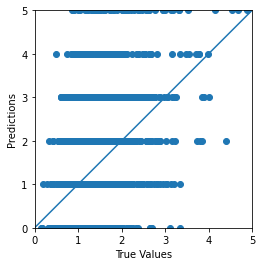

In [287]:
a = plt.axes(aspect='equal')
plt.scatter(y_pred, y_test)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 5]
plt.xlim(lims)
plt.ylim(lims)
_ = plt.plot(lims, lims)

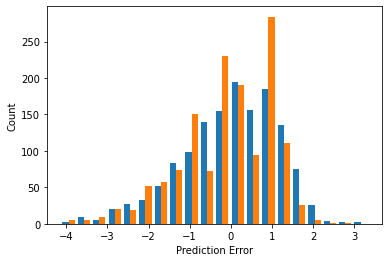

In [293]:
error = y_pred - y_test
plt.hist(error, bins = 20)
plt.xlabel("Prediction Error")
_ = plt.ylabel("Count")

In [270]:
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),2),y_test.reshape(len(y_test),2)),1))

[[1.95 0.88 2.   3.  ]
 [0.92 1.63 2.   2.  ]
 [1.65 0.67 2.   2.  ]
 ...
 [1.84 1.21 1.   2.  ]
 [1.54 1.19 2.   0.  ]
 [1.49 0.84 1.   3.  ]]


**MODEL EVALUATION**

In [301]:
#Model Evaluation using K-fold cross validator
estimator = KerasRegressor(build_fn=baseline_model)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)
print("Model_Result: %.2f (%.2f) MSE" % (results.mean(), results.std()))


Epoch 1/1
563/563 [==============================] - 0s 60us/step
Epoch 1/1
563/563 [==============================] - 0s 59us/step
Epoch 1/1
563/563 [==============================] - 0s 63us/step
Epoch 1/1
563/563 [==============================] - 0s 64us/step
Epoch 1/1
563/563 [==============================] - 0s 62us/step
Epoch 1/1
563/563 [==============================] - 0s 61us/step
Epoch 1/1
562/562 [==============================] - 0s 60us/step
Epoch 1/1
562/562 [==============================] - 0s 66us/step
Epoch 1/1
562/562 [==============================] - 0s 57us/step
Epoch 1/1
562/562 [==============================] - 0s 62us/step
Model_Result: -1.36 (0.05) MSE
